In [82]:
import pandas as pd

**1- Read Dataset into python**

In [83]:
df=pd.read_csv("Salary_Data_Based_country_and_race.csv",index_col=0)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


**Get dataframe info**

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.4+ KB


In [85]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


**3- Visualization**

Text(0.5, 1.0, "Visualizing NA's")

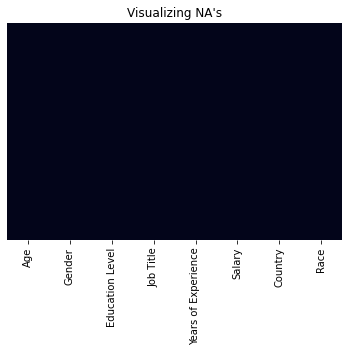

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.title("Visualizing NA's")

#No NA's

<AxesSubplot:xlabel='Years of Experience', ylabel='Salary'>

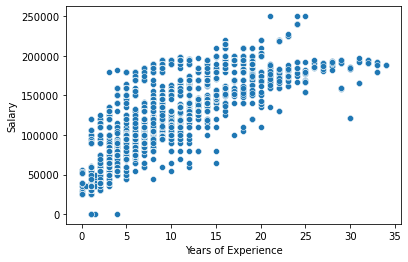

In [87]:
sns.scatterplot(x='Years of Experience', y='Salary', data=df)

<AxesSubplot:xlabel='Age', ylabel='Salary'>

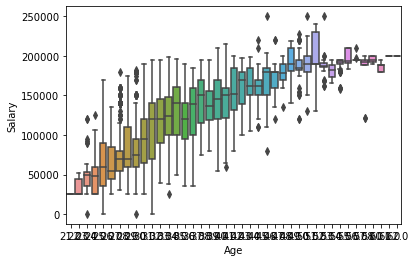

In [88]:
sns.boxplot(x='Age', y='Salary', data=df)

In [89]:
print("Mean Salary for White race:",df.loc[df['Race'] == 'White', 'Salary'].mean())
print("Mean Salary for Hispanic race:",df.loc[df['Race'] == 'Hispanic', 'Salary'].mean())
print("Mean Salary for Asian race:",df.loc[df['Race'] == 'Asian', 'Salary'].mean())

Mean Salary for White race: 117071.0555272542
Mean Salary for Hispanic race: 110410.1397515528
Mean Salary for Asian race: 115302.068621335


Text(0.5, 1.0, 'Salary by Race')

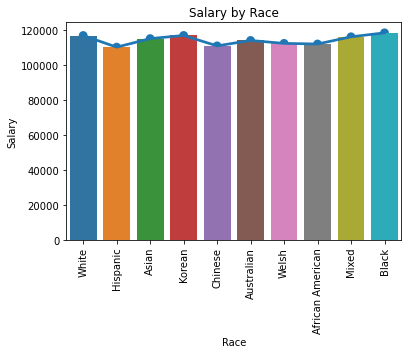

In [90]:
sns.barplot(x='Race', y='Salary', data=df,ci=None)  # Bar plot
sns.pointplot(x='Race', y='Salary', data=df, ci=None)  # Point plot
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.title("Salary by Race")

Caluclated Mean Salary by Race and Calulcated Mean Salary by Job Title to get a better understanding of the data and to plot the points

               Race         Salary
0  African American  112209.658192
1             Asian  115302.068621
2        Australian  114236.676991
3             Black  118601.212815
4           Chinese  111139.315315
5          Hispanic  110410.139752
6            Korean  117099.757112
7             Mixed  116330.859281
8             Welsh  112560.645646
9             White  117071.055527 

                    Job Title         Salary
0             Account Manager   75000.000000
1                  Accountant   55000.000000
2    Administrative Assistant   50000.000000
3          Back end Developer  102352.561475
4            Business Analyst   77500.000000
..                        ...            ...
188               UX Designer   80000.000000
189             UX Researcher   65000.000000
190             VP of Finance  200000.000000
191          VP of Operations  190000.000000
192             Web Developer   66436.781609

[193 rows x 2 columns]


Text(0.5, 1.0, 'Mean Salary by Race')

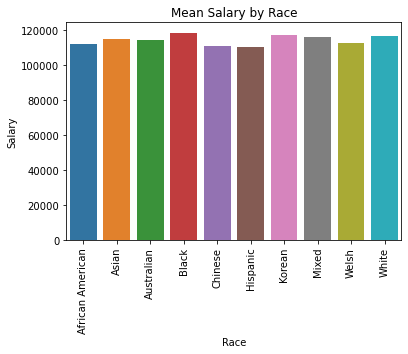

In [91]:
mean_salary_by_race = df.groupby('Race')['Salary'].mean().reset_index()
print(mean_salary_by_race,'\n')
mean_salary_by_job = df.groupby('Job Title')['Salary'].mean().reset_index()
print(mean_salary_by_job)
sns.barplot(x='Race', y='Salary', data=mean_salary_by_race)
plt.xticks(rotation=90)
plt.title("Mean Salary by Race")

Text(0.5, 1.0, 'Age VS Salary')

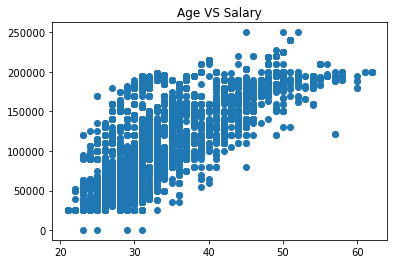

In [92]:
plt.scatter(df.Age,df.Salary)
plt.title("Age VS Salary")

2- Converting categorical columns to numeric using one hot encoding to perpare it for machine learning algorthims\
\
**Get dummies for data type "Object"**

In [93]:
final_df = pd.get_dummies(df,columns=['Gender','Education Level','Job Title','Country','Race'])
final_df

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Gender_Other,Education Level_Bachelor's,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,5.0,90000.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,28.0,3.0,65000.0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,45.0,15.0,150000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,36.0,7.0,60000.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52.0,20.0,200000.0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,20.0,200000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6700,32.0,3.0,50000.0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6701,30.0,4.0,55000.0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6702,46.0,14.0,140000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0



**All columns are now numeric**

In [94]:
#compate data types of the orginal df and final df
print(f"Original df data types:\n{df.dtypes}\n")
print(f"Final df data types:\n{final_df.dtypes}")

Original df data types:
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

Final df data types:
Age                    float64
Years of Experience    float64
Salary                 float64
Gender_Female            uint8
Gender_Male              uint8
                        ...   
Race_Hispanic            uint8
Race_Korean              uint8
Race_Mixed               uint8
Race_Welsh               uint8
Race_White               uint8
Length: 221, dtype: object


**4- EDA**

Hierarchial Clustering

In [96]:
from scipy.cluster.hierarchy import linkage, dendrogram

#extract dataframe as np arrays
final_df_values=final_df.values

mergings = linkage(final_df_values, method='complete')
dendrogram(mergings,
           labels=df.Salary,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

ValueError: The condensed distance matrix must contain only finite values.